<a href="https://colab.research.google.com/github/samuelflores/deep-learning-RNA-structure-prediction/blob/main/pyDCA_PRC_Sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import math
from numpy import asarray
from numpy import save
from numpy import load

from sklearn.preprocessing import StandardScaler
import os
import tempfile


import matplotlib as mpl
import sklearn

In [2]:
from sklearn.metrics import PrecisionRecallDisplay

In [22]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = sklearn.metrics.precision_recall_curve(labels, predictions)

    plt.plot( recall, precision, label=name, linewidth=2, **kwargs)
    plt.ylabel('Precision = TP/(TP+FP)')
    plt.xlabel('Recall = TP/(TP + FN)')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [23]:
df = pd.read_csv('./drive/MyDrive/deep-learning-RNA-structure-prediction/Floyd_Scripts_and_Figs/labeledfrequenciesanddca_april_26.csv')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df['bond_type'].values[df['bond_type']>0] = 1

In [26]:
set(df.bond_type)

{0, 1}

In [16]:
scaler = preprocessing.MinMaxScaler()
dca = df[['dca_val']]

In [17]:
y = scaler.fit_transform(dca)

In [18]:
df

,index,GA,GG,GC,GU,G-,CC,CU,CG,CA,...,AC,AA,--,-C,-U,-G,-A,bond_type,dca_val,file2
0,1:13D2G,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0,0.000000,3D2G
1,1:23D2G,0.0376,0.0187,0.0673,0.0752,0.0001,0.0286,0.0441,0.0407,0.0639,...,0.0931,0.0977,0.0150,0.0003,0.0000,0.0003,0.0002,0,0.287503,3D2G
2,1:33D2G,0.0635,0.0308,0.0563,0.0483,0.0000,0.0620,0.0436,0.0253,0.0465,...,0.1293,0.0779,0.0138,0.0002,0.0007,0.0001,0.0010,0,0.065946,3D2G
3,1:43D2G,0.0600,0.0362,0.0628,0.0393,0.0006,0.0465,0.0268,0.0431,0.0609,...,0.0650,0.1330,0.0129,0.0015,0.0006,0.0002,0.0006,0,-0.062766,3D2G
4,1:53D2G,0.0399,0.0422,0.0820,0.0345,0.0002,0.0831,0.0325,0.0153,0.0465,...,0.1509,0.0814,0.0121,0.0018,0.0002,0.0009,0.0009,0,0.037044,3D2G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623412,84:804FRG,0.5236,0.0047,0.0142,0.0425,0.0094,0.0094,0.0047,0.0047,0.0094,...,0.0189,0.1840,0.0425,0.0000,0.0094,0.0000,0.0000,0,-0.017244,4FRG
1623413,84:814FRG,0.0330,0.0047,0.0094,0.0189,0.0000,0.0094,0.0094,0.0000,0.1462,...,0.0236,0.0377,0.0425,0.0000,0.0047,0.0000,0.0000,0,0.071048,4FRG
1623414,84:824FRG,0.0330,0.0047,0.0047,0.0094,0.0000,0.0094,0.0047,0.0000,0.0472,...,0.0236,0.5566,0.0425,0.0000,0.0000,0.0000,0.0000,0,-0.093757,4FRG
1623415,84:834FRG,0.0566,0.0047,0.0142,0.0094,0.0000,0.0047,0.0094,0.0000,0.0660,...,0.0189,0.1934,0.0425,0.0000,0.0000,0.0000,0.0047,0,0.175769,4FRG


In [38]:
df.nlargest(n=10, columns=["dca_val"]) #.bond_type.values()


,index,GA,GG,GC,GU,G-,CC,CU,CG,CA,...,AC,AA,--,-C,-U,-G,-A,bond_type,dca_val,file2
524991,29:411EHZ,0.0000,0.0000,0.3372,0.0063,0.0000,0.0010,0.0000,0.1288,0.0021,...,0.0063,0.0021,0.0000,0.0000,0.0000,0.0000,0.0000,1,4.906716,1EHZ
525891,41:291EHZ,0.0000,0.0000,0.3372,0.0063,0.0000,0.0010,0.0000,0.1288,0.0021,...,0.0063,0.0021,0.0000,0.0000,0.0000,0.0000,0.0000,0,4.906716,1EHZ
160235,33:413RG5,0.0004,0.0000,0.2750,0.0021,0.0004,0.0000,0.0004,0.0326,0.0000,...,0.0051,0.0000,0.0000,0.0004,0.0000,0.0000,0.0000,1,4.764795,3RG5
160915,41:333RG5,0.0004,0.0000,0.2750,0.0021,0.0004,0.0000,0.0004,0.0326,0.0000,...,0.0051,0.0000,0.0000,0.0004,0.0000,0.0000,0.0000,0,4.764795,3RG5
1592764,69:781Z43,0.0029,0.0002,0.2891,0.0002,0.0000,0.0000,0.0002,0.1229,0.0000,...,0.0004,0.0006,0.0000,0.0000,0.0000,0.0000,0.0002,1,4.654802,1Z43
1593664,78:691Z43,0.0029,0.0002,0.2891,0.0002,0.0000,0.0000,0.0002,0.1229,0.0000,...,0.0004,0.0006,0.0000,0.0000,0.0000,0.0000,0.0002,0,4.654802,1Z43
176456,56:684GMA,0.0002,0.0000,0.0936,0.0044,0.0002,0.0001,0.0003,0.6656,0.0009,...,0.0003,0.0001,0.0031,0.0001,0.0001,0.0007,0.0002,0,4.640454,4GMA
178964,68:564GMA,0.0002,0.0000,0.0936,0.0044,0.0002,0.0001,0.0003,0.6656,0.0009,...,0.0003,0.0001,0.0031,0.0001,0.0001,0.0007,0.0002,0,4.640454,4GMA
627810,18:236CB3,0.0024,0.0012,0.1813,0.0024,0.0012,0.0024,0.0000,0.2161,0.0000,...,0.0000,0.0000,0.0660,0.0000,0.0000,0.0000,0.0000,1,4.623609,6CB3
628300,23:186CB3,0.0024,0.0012,0.1813,0.0024,0.0012,0.0024,0.0000,0.2161,0.0000,...,0.0000,0.0000,0.0660,0.0000,0.0000,0.0000,0.0000,0,4.623609,6CB3


In [39]:
topN = 10
print(sum(df.nlargest(n=topN, columns=["dca_val"]).bond_type.values)/topN)

0.4


In [19]:
mpl.rcParams['figure.figsize'] = (15, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

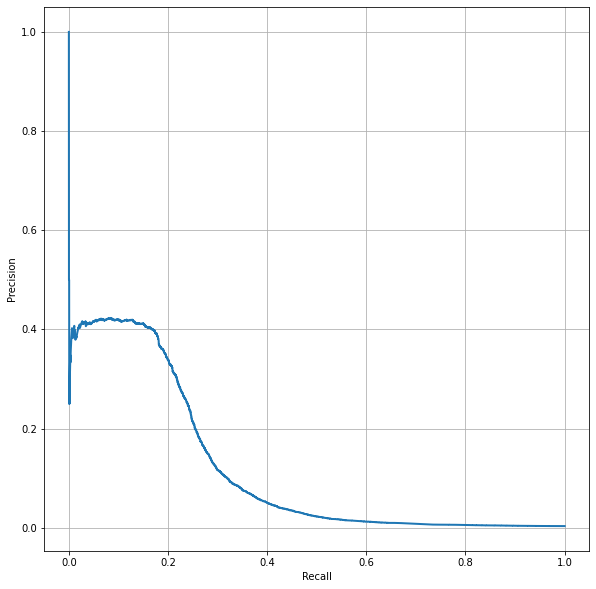

In [20]:
plot_prc('pyDCA', df.bond_type, y)

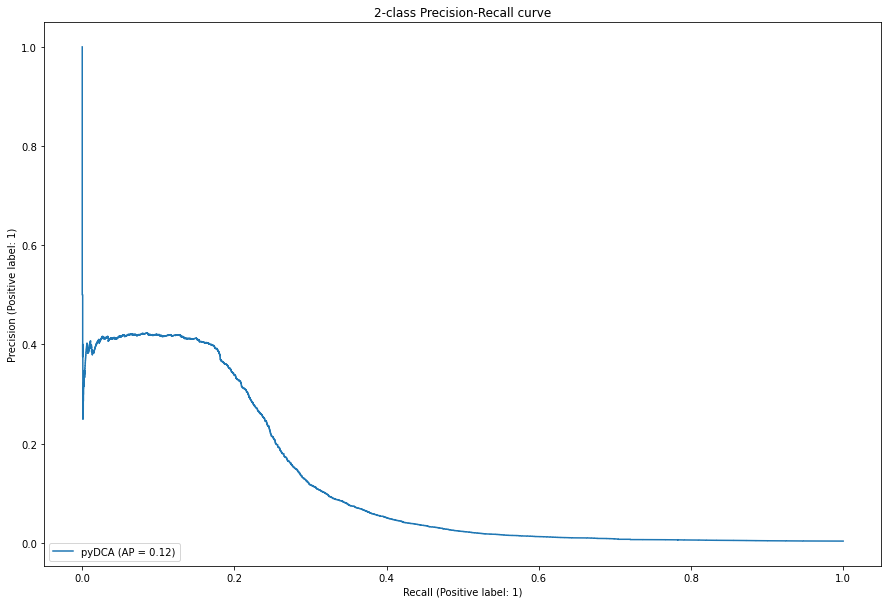

In [ ]:
display = PrecisionRecallDisplay.from_predictions(df.bond_type, y, name="pyDCA")
_ = display.ax_.set_title("2-class Precision-Recall curve")